# BANK CUSTOMERS RETIREMENT PREDICTIONS USING SUPPORT VECTOR MACHINES


# STEP #1: PROBLEM STATEMENT

You work as a data scientist at a major bank in NYC and you have been tasked to develop a model that can predict whether a customer is able to retire or not based on his/her features. Features are his/her age and net 401K savings (retirement savings in the U.S.).

# STEP #2: IMPORTING DATA

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('Bank_Customer_retirement.csv')
df.head()

,Customer ID,Age,401K Savings,Retire
0,0,39.180417,322349.8740,0
1,1,56.101686,768671.5740,1
2,2,57.023043,821505.4718,1
3,3,43.711358,494187.4850,0
4,4,54.728823,691435.7723,1


In [4]:
df.columns

Index(['Customer ID', 'Age', '401K Savings', 'Retire'], dtype='object')

In [5]:
df.shape

(500, 4)

In [6]:
df.tail()

,Customer ID,Age,401K Savings,Retire
495,495,46.678128,704243.0776,1
496,496,43.545007,483175.9998,0
497,497,46.476724,354919.1987,0
498,498,50.903631,639789.9219,1
499,499,38.590586,491310.0096,0


# STEP #3: VISUALIZING THE DATA

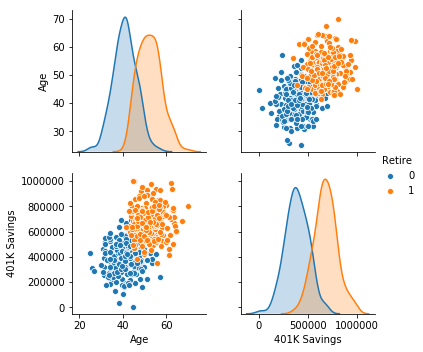

In [11]:
sns.pairplot(data=df, vars=('Age', '401K Savings'),hue='Retire')

Customers with higher 401K Savings and who are aged are eligible to retire. Whereas, younger crowd with less 401K savings are not eligible to retire.

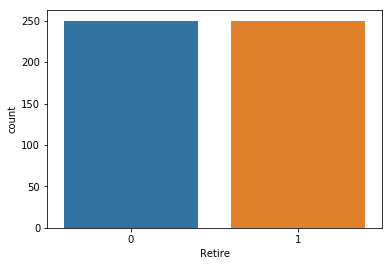

In [12]:
sns.countplot(df['Retire'])

# STEP #4: MODEL TRAINING 

In [16]:
X = df.drop(['Retire', 'Customer ID'], axis=1)

Dropping customer ID and Retire columns to create the predictor dataframe.

In [17]:
X

,Age,401K Savings
0,39.180417,322349.8740
1,56.101686,768671.5740
2,57.023043,821505.4718
3,43.711358,494187.4850
4,54.728823,691435.7723
...,...,...
495,46.678128,704243.0776
496,43.545007,483175.9998
497,46.476724,354919.1987
498,50.903631,639789.9219


In [18]:
y = df['Retire']

In [19]:
y

0      0
1      1
2      1
3      0
4      1
      ..
495    1
496    0
497    0
498    1
499    0
Name: Retire, Length: 500, dtype: int64

In [59]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 5)

In [60]:
from sklearn.svm import SVC
classifier = SVC()

In [61]:
classifier.fit(X_train, y_train)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

# STEP #5: EVALUATING THE MODEL

In [62]:
y_predict = classifier.predict(X_test)

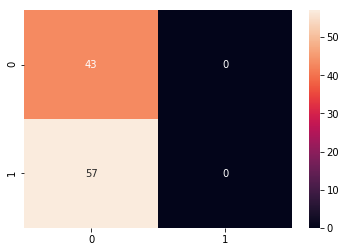

In [63]:
from sklearn.metrics import confusion_matrix, classification_report
cm = confusion_matrix(y_test, y_predict)
sns.heatmap(cm, annot=True, fmt='d')

In [64]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.43      1.00      0.60        43
           1       0.00      0.00      0.00        57

   micro avg       0.43      0.43      0.43       100
   macro avg       0.21      0.50      0.30       100
weighted avg       0.18      0.43      0.26       100



/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


# STEP #6: IMPROVING THE MODEL

Using normalisation

In [65]:
min_train = X_train.min()
print(min_train)

Age             25.0
401K Savings    10.0
dtype: float64


In [66]:
range_train = (X_train-min_train).max()
range_train

Age                 42.318208
401K Savings    999990.000000
dtype: float64

In [67]:
X_train_scaled = (X_train-min_train)/range_train

In [68]:
X_train_scaled

,Age,401K Savings
247,0.488640,0.684860
390,0.731713,0.651642
186,0.636117,0.669911
484,0.544773,0.718011
139,0.455655,0.363796
...,...,...
486,0.315494,0.033828
189,0.281290,0.374391
495,0.512265,0.704240
206,0.510404,0.626791


In [69]:
y_train

247    1
390    1
186    1
484    1
139    0
      ..
486    0
189    0
495    1
206    1
355    0
Name: Retire, Length: 400, dtype: int64

In [70]:
min_test = X_test.min()
print(min_test)
range_test = (X_test-min_test).max()
range_test
X_test_scaled = (X_test-min_test)/range_test

Age                 31.787663
401K Savings    109281.634500
dtype: float64


In [71]:
X_test_scaled

,Age,401K Savings
241,0.267183,0.094430
448,0.165409,0.505061
75,0.139272,0.302988
212,0.248950,0.550203
481,0.323557,0.677682
...,...,...
145,0.633436,0.635622
234,0.612141,0.525418
382,0.444550,0.850610
141,0.538401,0.412874


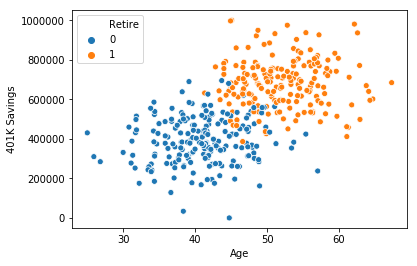

In [72]:
sns.scatterplot('Age', '401K Savings', data=X_train, hue=y_train)

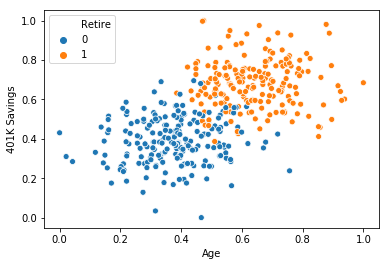

In [73]:
sns.scatterplot('Age', '401K Savings', data=X_train_scaled, hue=y_train)

In [74]:
classifier_scaled = SVC()
classifier_scaled.fit(X_train_scaled, y_train)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [75]:
y_predict_scaled = classifier_scaled.predict(X_test_scaled)

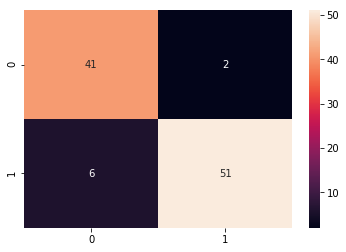

In [76]:
cm = confusion_matrix(y_test, y_predict_scaled)
sns.heatmap(cm, annot=True, fmt='d')

In [77]:
print(classification_report(y_test, y_predict_scaled))

              precision    recall  f1-score   support

           0       0.87      0.95      0.91        43
           1       0.96      0.89      0.93        57

   micro avg       0.92      0.92      0.92       100
   macro avg       0.92      0.92      0.92       100
weighted avg       0.92      0.92      0.92       100



# IMPROVING THE MODEL - PART 2

Using parameter optimization

In [78]:
param_grid = {'C':[0.1, 1, 10, 100], 'gamma': [1,0.1, 0.01,0.001], 'kernel':['rbf']}

In [79]:
from sklearn.model_selection import GridSearchCV

In [81]:
grid = GridSearchCV(SVC(), param_grid, refit=True, verbose=4)#refit to obtain best parameter

In [82]:
grid.fit(X_train_scaled, y_train)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s


Fitting 3 folds for each of 16 candidates, totalling 48 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV]  C=0.1, gamma=1, kernel=rbf, score=0.9552238805970149, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV]  C=0.1, gamma=1, kernel=rbf, score=0.9624060150375939, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV]  C=0.1, gamma=1, kernel=rbf, score=0.924812030075188, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV]  C=0.1, gamma=0.1, kernel=rbf, score=0.5149253731343284, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV]  C=0.1, gamma=0.1, kernel=rbf, score=0.518796992481203, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV]  C=0.1, gamma=0.1, kernel=rbf, score=0.518796992481203, total=   0.0s
[CV] C=0.1, gamma=0.01, kernel=rbf ...............................

[Parallel(n_jobs=1)]: Done  48 out of  48 | elapsed:    0.4s finished


GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001], 'kernel': ['rbf']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=4)

In [83]:
grid.best_params_

{'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}

In [84]:
grid_predict = grid.predict(X_test_scaled)

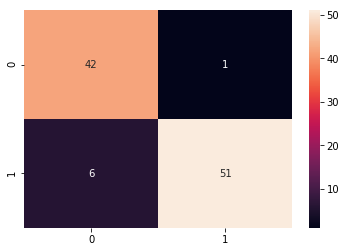

In [85]:
cm_grid = confusion_matrix(y_test, grid_predict)
sns.heatmap(cm_grid, annot=True, fmt='d')

In [86]:
print(classification_report(y_test, grid_predict))

              precision    recall  f1-score   support

           0       0.88      0.98      0.92        43
           1       0.98      0.89      0.94        57

   micro avg       0.93      0.93      0.93       100
   macro avg       0.93      0.94      0.93       100
weighted avg       0.94      0.93      0.93       100

